## Dataset taken from kaggle
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
### Aim is to classify between two type of disagnosis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df['Unnamed: 32'].nunique()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Id and unnamed: 32 fields seems to be useless
we will drop them

In [7]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Mapping the diagnosis values to the numeric values

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


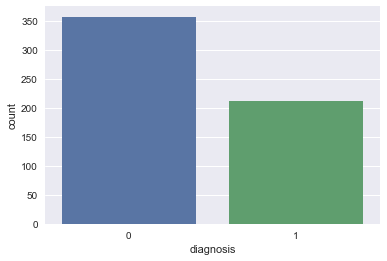

In [13]:
sns.countplot(x='diagnosis',data=df)

In [14]:
df.columns

Index([u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

We will take only the first 11 columns since the other are not useful, read the description given on kaggle.

In [15]:
df = df.iloc[:,:11]

In [16]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [17]:
df.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [18]:

df2 = df.groupby('diagnosis').mean()

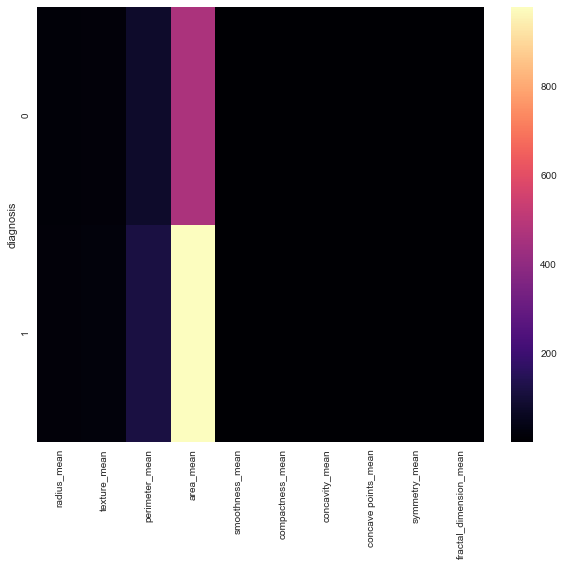

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df2,cmap='magma')


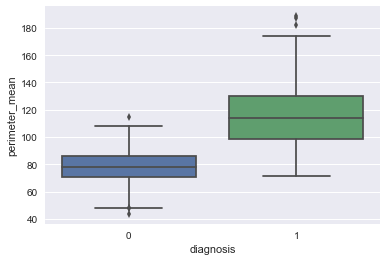

In [20]:

sns.boxplot(x='diagnosis',y='perimeter_mean',data=df)


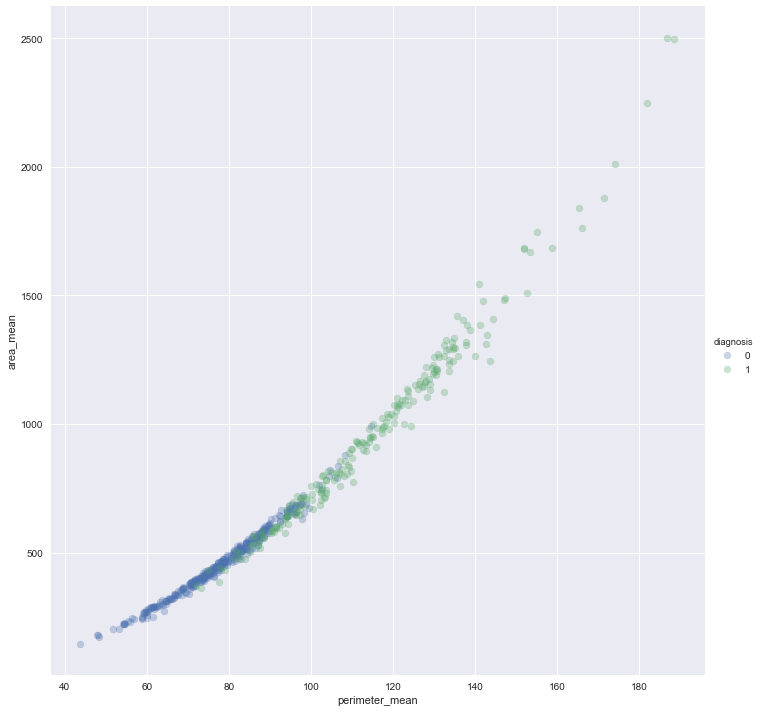

In [21]:
plt.figure(figsize=(10,8))
fig = sns.FacetGrid(df,hue='diagnosis',size=(10))
fig.map(plt.scatter,'perimeter_mean','area_mean',alpha=.3)
fig.add_legend()

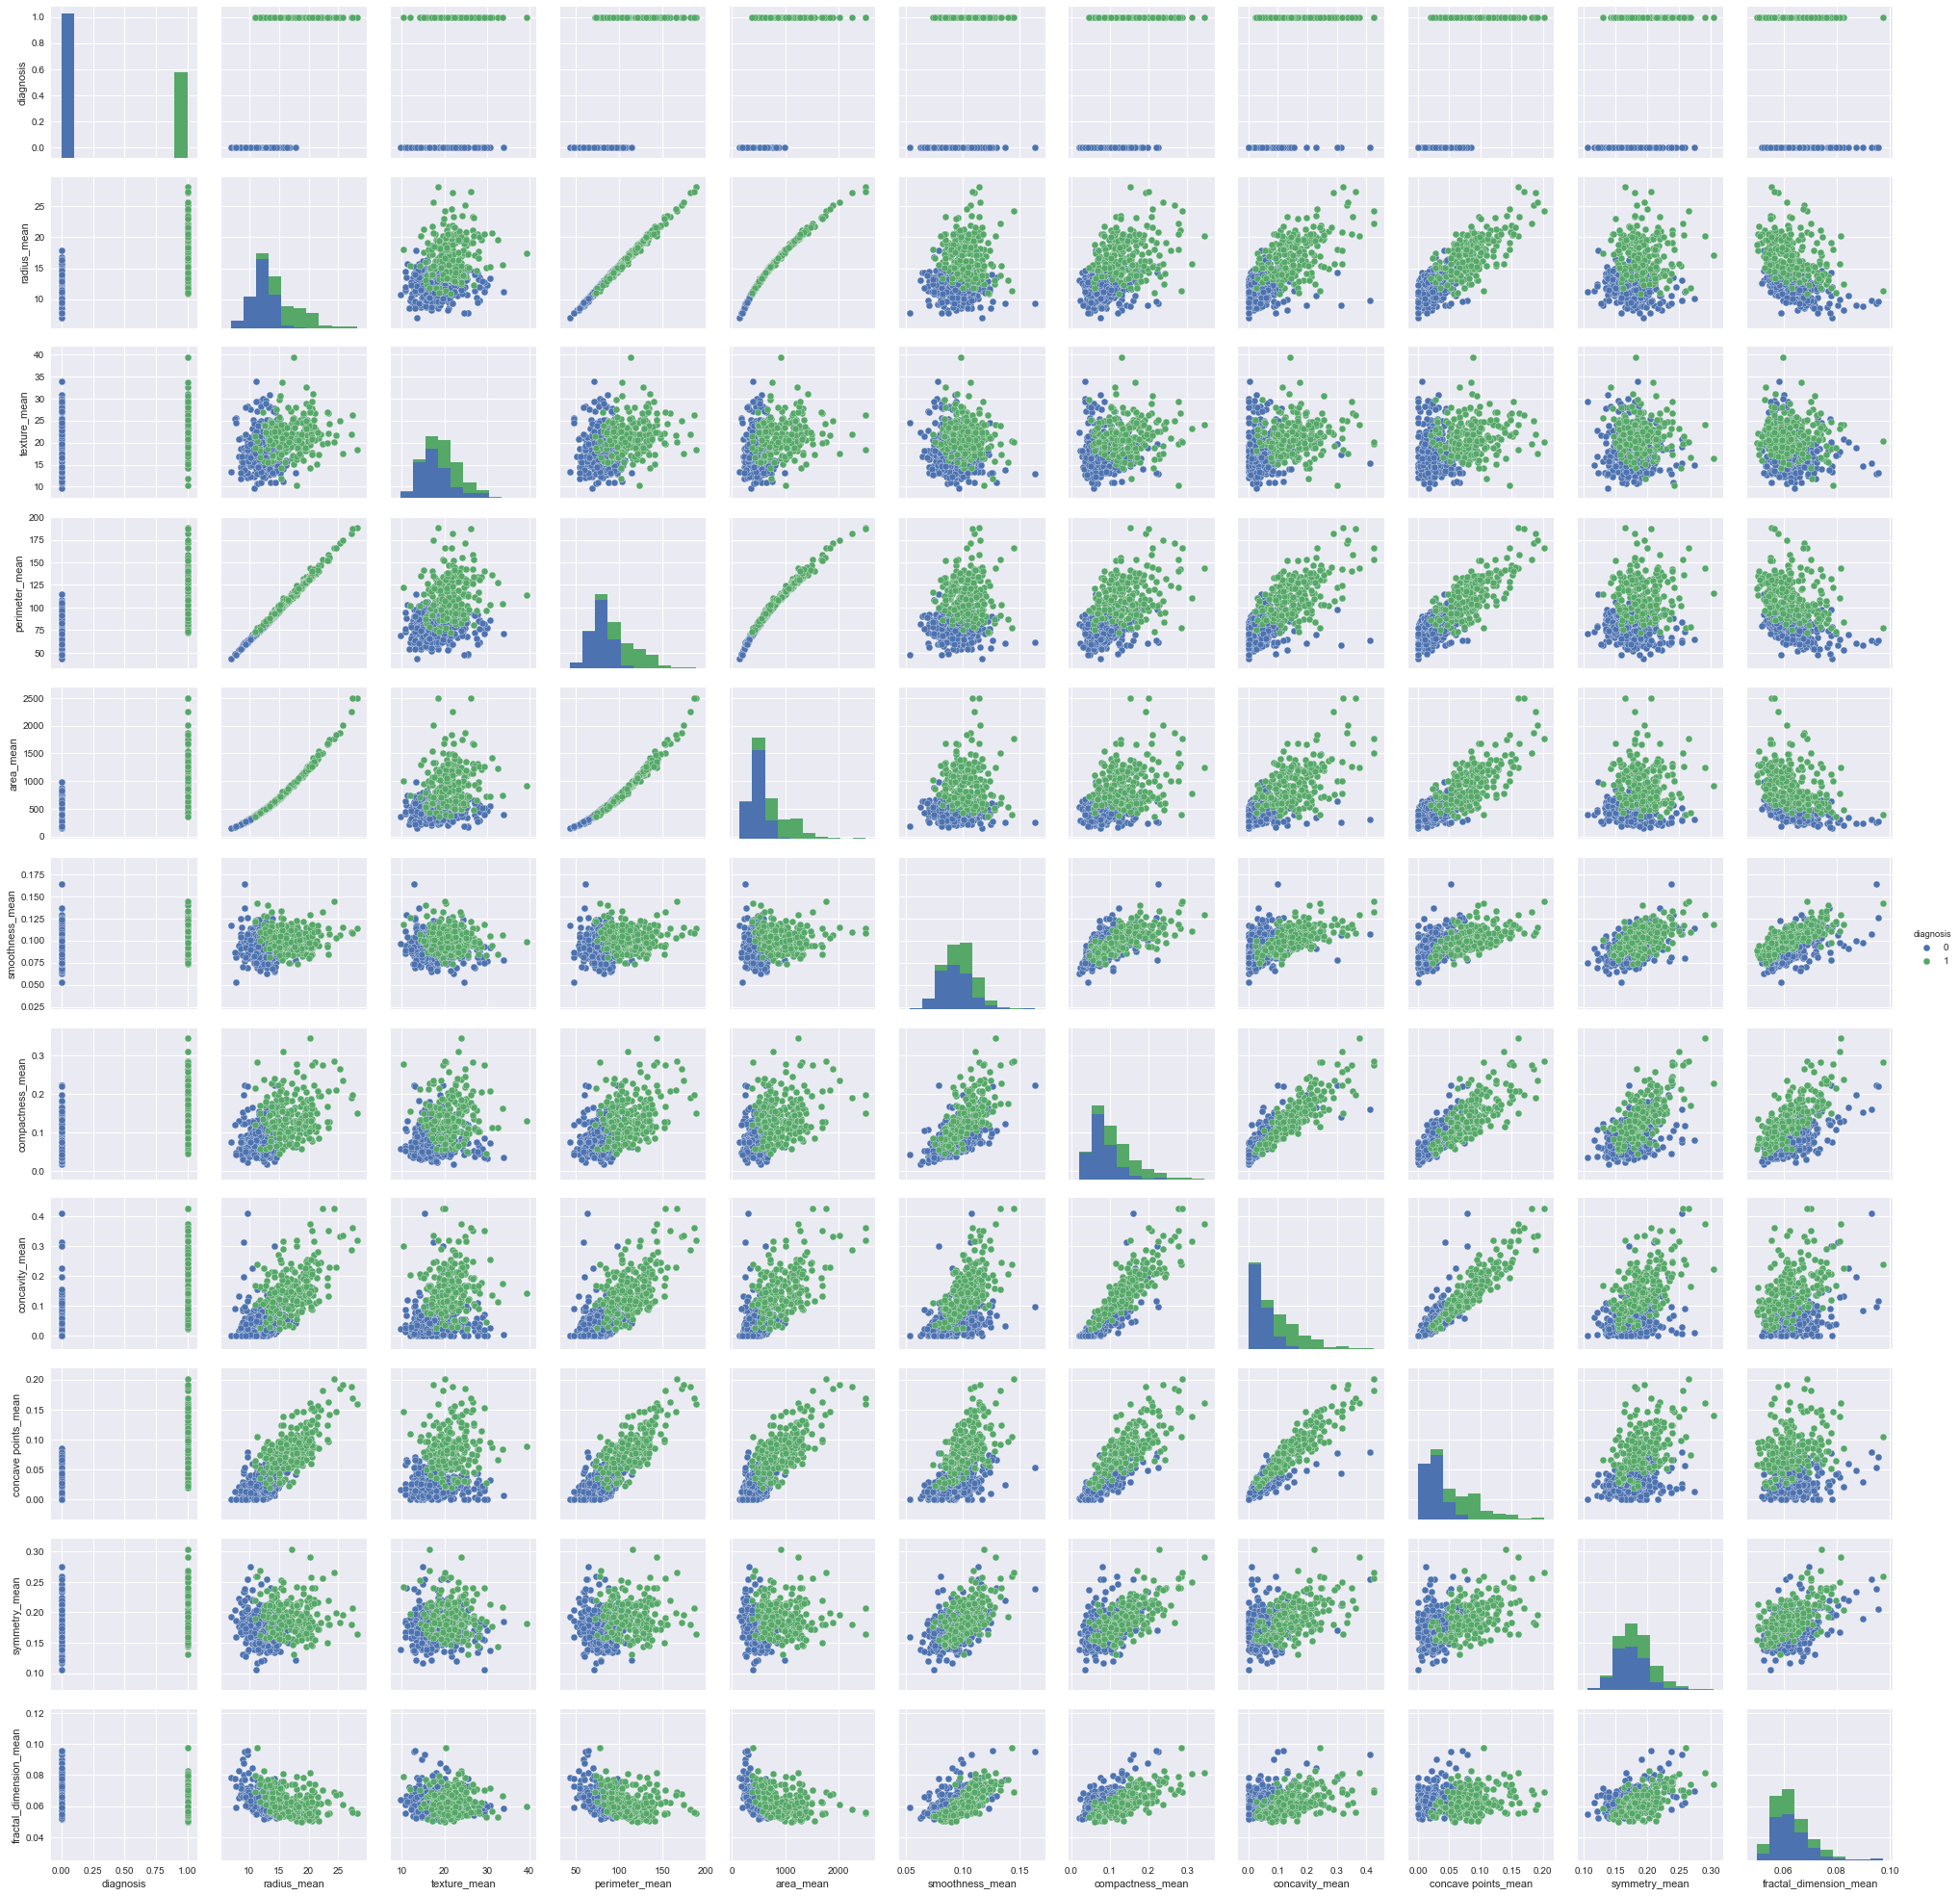

In [22]:
sns.pairplot(df,hue='diagnosis')

In [23]:
#Import models from scikit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import roc_auc_score

C:\Users\Aditya\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


This function will evaluate the models on the basis of accuracy score and Kfold

In [24]:
def check_model(model, shape, X_train, y_train):
  
  model.fit(X_train,y_train)
  
  
  predictions = model.predict(X_train)
  
  
  accuracy = metrics.accuracy_score(predictions,y_train)
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(shape, n_folds=5)
  error = []
  for train, test in kf:

    train_predictors = (X_train.iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(X_train.iloc[test,:], y_train.iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(X_train,y_train) 

In [25]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [26]:
print("Logistic Regression")
model = LogisticRegression()
check_model(model,df.shape[0],df.drop('diagnosis',axis=1),df['diagnosis'])
print("Decision Tree")
model = DecisionTreeClassifier()
check_model(model,df.shape[0],df.drop('diagnosis',axis=1),df['diagnosis'])
print("Random Forest")
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
check_model(model,df.shape[0],df.drop('diagnosis',axis=1),df['diagnosis'])

Logistic Regression
Accuracy : 90.861%
Cross-Validation Score : 78.070%
Cross-Validation Score : 83.772%
Cross-Validation Score : 87.427%
Cross-Validation Score : 88.816%
Cross-Validation Score : 89.283%
Decision Tree
Accuracy : 100.000%
Cross-Validation Score : 89.474%
Cross-Validation Score : 89.035%
Cross-Validation Score : 90.643%
Cross-Validation Score : 91.447%
Cross-Validation Score : 91.565%
Random Forest
Accuracy : 96.134%
Cross-Validation Score : 84.211%
Cross-Validation Score : 88.158%
Cross-Validation Score : 90.936%
Cross-Validation Score : 92.105%
Cross-Validation Score : 92.799%


Random Forest has the best cross validation score and also has a very good accuracy score
and this can be improved by finding the best parameters for the model.

This function will help us decide the best parameters

In [131]:

results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]
param = []

for min_sample in min_samples_leaf_options:
    for max_features in max_features_options:
        for n_estimator in n_estimator_options:
            param.append('min_sample:'+str(min_sample)+'max_feature:'+str(max_features)+'n_est:'+str(n_estimator))
            model = RandomForestRegressor(n_estimators=n_estimator, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features=max_features, 
                                  min_samples_leaf=min_sample)
            model.fit(df.drop('diagnosis',axis=1), df['diagnosis'])
            
            roc = roc_auc_score(df['diagnosis'], model.oob_prediction_)
            results.append(roc)
    print(min_sample)
            

ss =  pd.DataFrame({'Score':results,'Parameters':param})
ss[ss['Score']==ss['Score'].max()]



1
2
3
4
5
6
7
8
9
10


,Parameters,Score
41,min_sample:1max_feature:0.2n_est:2000,0.984488


In [134]:

model = RandomForestRegressor(n_estimators=2000,min_samples_split=2, max_depth=7, max_features=0.2,oob_score=True,min_samples_leaf=1)
model.fit(df.drop('diagnosis',axis=1), df['diagnosis'])
            
roc = roc_auc_score(df['diagnosis'], model.oob_prediction_)
roc


0.98414460123672109

In [136]:
model = RandomForestClassifier(n_estimators=2000,min_samples_split=2, max_depth=7, max_features=0.2,oob_score=True,min_samples_leaf=1)
check_model(model,df.shape[0],df.drop('diagnosis',axis=1),df['diagnosis'])

Accuracy : 99.297%
Cross-Validation Score : 88.596%
Cross-Validation Score : 91.228%
Cross-Validation Score : 93.275%
Cross-Validation Score : 94.079%
Cross-Validation Score : 94.201%


We can observe that the score and accuracy has improved